In [2]:
!pip install tweepy

In [3]:
!pip install textblob

In [113]:
import twitter

# initialize api instance
twitter_api = twitter.Api(consumer_key='HOXs6dN9UApOrjdP3sDG8q7Bx',
                        consumer_secret='TzR3sATRX2FwL61Qhro1d4KenvLhKuCvYNS5OKzmxeK7HRkRg2',
                        access_token_key='1301245220416188416-DvgyzLiFkYDfdozX0Afl2WR8eItktR',
                        access_token_secret='ZjeOuGzFw440IkvbPlKUKshONinTU136UVU9twyG5cUhJ')

# test authentication
print(twitter_api.VerifyCredentials())

ModuleNotFoundError: No module named 'twitter'

In [25]:
import tweepy
from textblob import TextBlob
consumer_key = 'HOXs6dN9UApOrjdP3sDG8q7Bx'
consumer_secret = 'TzR3sATRX2FwL61Qhro1d4KenvLhKuCvYNS5OKzmxeK7HRkRg2'
access_token = '1301245220416188416-DvgyzLiFkYDfdozX0Afl2WR8eItktR'
access_token_secret = 'ZjeOuGzFw440IkvbPlKUKshONinTU136UVU9twyG5cUhJ'
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
public_tweets = api.search('Coronavirus')
for tweets in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)

RT @Mediavenir: 🇫🇷 ALERTE - 9 843 cas de #coronavirus en 24h en France, un record absolu depuis le début de la pandémie et la première fois…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @Mediavenir: 🇫🇷 ALERTE - 9 843 cas de #coronavirus en 24h en France, un record absolu depuis le début de la pandémie et la première fois…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @Mediavenir: 🇫🇷 ALERTE - 9 843 cas de #coronavirus en 24h en France, un record absolu depuis le début de la pandémie et la première fois…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @Mediavenir: 🇫🇷 ALERTE - 9 843 cas de #coronavirus en 24h en France, un record absolu depuis le début de la pandémie et la première fois…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @Mediavenir: 🇫🇷 ALERTE - 9 843 cas de #coronavirus en 24h en France, un record absolu depuis le début de la pandémie et la première fois…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @Mediavenir: 🇫🇷 ALERTE - 9 843 cas de #coronavirus en 24h en France, un record abs

In [114]:
def buildTestSet(search_keyword):
    try:
        tweets_fetched = twitter_api.GetSearch(search_keyword, count = 100)
        
        print("Fetched " + str(len(tweets_fetched)) + " tweets for the term " + search_keyword)
        
        return [{"coronavirus":status.text, "label":None} for status in tweets_fetched]
    except:
        print("Unfortunately, something went wrong..")
        return None

In [116]:
def buidTrainingSet(corpusFile, tweetDataFile):
    import csv
    import time
    
    corpus = []
    
    with open(corpusFile,'rb') as csvfile:
        lineReader = csv.reader(csvfile,delimiter=',', quotechar="\"")
        for row in lineReader:
            corpus.append({"tweet_id":row[2], "label":row[1], "topic":row[0]})
            
    rate_limit = 180
    sleep_time = 900/180
    
    trainingDataSet = []
    
    for tweet in corpus:
        try:
            status = twitter_api.GetStatus(tweet["tweet_id"])
            print("Tweet fetched" + status.text)
            tweet["text"] = status.text
            trainingDataSet.append(tweet)
            time.sleep(sleep_time) 
        except: 
            continue
    # now we write them to the empty CSV file
    with open(tweetDataFile,'wb') as csvfile:
        linewriter = csv.writer(csvfile,delimiter=',',quotechar="\"")
        for tweet in trainingDataSet:
            try:
                linewriter.writerow([tweet["tweet_id"], tweet["text"], tweet["label"], tweet["topic"]])
            except Exception as e:
                print(e)
    return trainingDataSet

In [26]:
def get_tweet_sentiment(self, tweet):
   # create TextBlob object of passed tweet text
   analysis = TextBlob(self.trim_tweet(tweet))
   # set sentiment
   if analysis.sentiment.polarity > 0:
      return 'positive'
   elif analysis.sentiment.polarity == 0:
      return 'neutral'
   else:
      return 'negative'

In [22]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [28]:
def buildTestSet(public_tweets):
    try:
        tweets_fetched = twitter_api.GetSearch(public_tweets, count=100)
        
        print("Fetched " + str(len(tweets_fetched)) + " tweets for the term " + public_tweets)

        return [{"text":status.text, "label":None} for status in tweets_fetched]
    except:
        print("Unfortunately, something went wrong..")
        return None

In [32]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
  
# set access to user's access key and access secret  
auth.set_access_token(access_token, access_token_secret) 
  
# calling the api  
api = tweepy.API(auth) 
  
# the ID of the user 
id = 57741058
  
# fetching the user 
user = api.get_user(id) 
  
# fetching the statuses_count attribute 
statuses_count = user.statuses_count  
  
print("The number of statuses the user has posted are : " + str(statuses_count)) 


The number of statuses the user has posted are : 13512


In [107]:
import tweepy

#Add your credentials here
twitter_keys = {
         'consumer_key': 'HOXs6dN9UApOrjdP3sDG8q7Bx',
         'consumer_secret': 'TzR3sATRX2FwL61Qhro1d4KenvLhKuCvYNS5OKzmxeK7HRkRg2',
         'access_token': '1301245220416188416-DvgyzLiFkYDfdozX0Afl2WR8eItktR',
         'access_token_secret': 'ZjeOuGzFw440IkvbPlKUKshONinTU136UVU9twyG5cUhJ'
    }

#Setup access to API
auth = tweepy.OAuthHandler(twitter_keys['consumer_key'], twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token'], twitter_keys['access_token_secret'])

api = tweepy.API(auth)

#Make call on home timeline, print each tweets text
public_tweets = api.search('Coronavirus')
for tweet in public_tweets:
    print(tweet.text)

RT @GlennKesslerWP: What a misleading clip. Biden's full quote: " I want to take a moment to say it’s not a time to panic about coronavirus…
RT @yaaya_7: il a fallut le coronavirus pour avoir du savon
RT @SRuhle: Reminder - @VP was head of the Coronavirus Task Force.  He had the same information @realDonaldTrump did
RT @goldenrosae: o namjoon tava chorando porque se emocionou falando sobre os tempos difíceis que a gente tá vivendo por causa do coronavir…
RT @eugenegu: @realDonaldTrump I don’t understand why this is so hard for Trump and the Republicans to understand. You don’t need to crowd…
RT @larepublica_pe: Hombre con hemiplejia denuncia que empresa lo liquidó con un solo sueldo tras trabajar durante 16 años  
https://t.co/d…
RT @SkyNews: Coronavirus: Universities told not to send students home in the event of an outbreak https://t.co/wYJKKvLP2M
RT @ArthurDelaneyHP: Talked to an unemployed freelance TV producer who fell behind on mortgage after the $600 disappeared. 

Her mood: “I 

In [108]:
import json 

status = public_tweets[0]

#convert to string
json_str = json.dumps(status._json)

#deserialise string into python object
parsed = json.loads(json_str)

print(json.dumps(parsed, indent=4, sort_keys=True))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Sep 10 19:07:24 +0000 2020",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [],
        "user_mentions": [
            {
                "id": 235196204,
                "id_str": "235196204",
                "indices": [
                    3,
                    18
                ],
                "name": "Glenn Kessler",
                "screen_name": "GlennKesslerWP"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "geo": null,
    "id": 1304134398640619520,
    "id_str": "1304134398640619520",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": true,
    "lang": "en",
    "metadata": {
        "iso_language_code": "en",
        "result_type": "recent"
    },
    "place": null,
    "quote

In [109]:
class TweetMiner(object):

    result_limit    =   20    
    data            =   []
    api             =   False
    
    twitter_keys = {
         'consumer_key': 'HOXs6dN9UApOrjdP3sDG8q7Bx',
         'consumer_secret': 'TzR3sATRX2FwL61Qhro1d4KenvLhKuCvYNS5OKzmxeK7HRkRg2',
         'access_token': '1301245220416188416-DvgyzLiFkYDfdozX0Afl2WR8eItktR',
         'access_token_secret': 'ZjeOuGzFw440IkvbPlKUKshONinTU136UVU9twyG5cUhJ'
    }
    
    
    def __init__(self, keys_dict=twitter_keys, api=api, result_limit = 20):
        
        self.twitter_keys = keys_dict
        
        auth = tweepy.OAuthHandler(keys_dict['consumer_key'], keys_dict['consumer_secret'])
        auth.set_access_token(keys_dict['access_token'], keys_dict['access_token_secret'])
        
        self.api = tweepy.API(auth)
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        

    def mine_user_tweets(self, user="dril", #BECAUSE WHO ELSE!
                         mine_rewteets=False,
                         max_pages=5):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                     count=self.result_limit,
                                                     max_id=last_tweet_id - 1,
                                                     tweet_mode = 'extended',
                                                     include_retweets=True
                                                    )        
            else:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                        count=self.result_limit,
                                                        tweet_mode = 'extended',
                                                        include_retweets=True)
                
            for item in statuses:

                mined = {
                    'tweet_id':        item.id,
                    'name':            item.user.name,
                    'screen_name':     item.user.screen_name,
                    'retweet_count':   item.retweet_count,
                    'text':            item.full_text,
                    'mined_at':        datetime.datetime.now(),
                    'created_at':      item.created_at,
                    'favourite_count': item.favorite_count,
                    'hashtags':        item.entities['hashtags'],
                    'status_count':    item.user.statuses_count,
                    'location':        item.place,
                    'source_device':   item.source
                }
                
                try:
                    mined['retweet_text'] = item.retweeted_status.full_text
                except:
                    mined['retweet_text'] = 'None'
                try:
                    mined['quote_text'] = item.quoted_status.full_text
                    mined['quote_screen_name'] = status.quoted_status.user.screen_name
                except:
                    mined['quote_text'] = 'None'
                    mined['quote_screen_name'] = 'None'
                
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data 

In [110]:
import tweepy
import datetime
import pandas as pd

In [111]:
miner=TweetMiner(result_limit = 200 )

In [123]:
mined_tweets = miner.mine_user_tweets(user='dril', max_pages=17)

mined_tweets_df= pd.DataFrame(mined_tweets)

In [124]:
import time

handle_list= ['list of handles you want the timelines of']

twitter_dict={}
counter=0

for name in handle_list:
    try:
      twitter_dict[name]=[]
      twitter_dict[name].append(miner.mine_user_tweets(user=name, max_pages=17))
      counter = counter +1
      if counter%40==0:
        time.sleep(900) #15 minute sleep time
    #if name invalid print name and remove key
    except:
      print(name, 'is invalid or locked')
      twitter_dict.pop(name)
    
all_tweets=pd.concat([pd.DataFrame(twitter_dict[i][0]) for i in twitter_dict])

In [116]:
mined_tweets_df.describe()

,tweet_id,retweet_count,favourite_count,status_count
count,3.211000e+03,3211.000000,3211.000000,3211.0
mean,1.052207e+18,1529.076300,10062.895360,10063.0
std,1.444258e+17,2043.188065,11530.785294,0.0
min,7.919466e+17,0.000000,0.000000,10063.0
25%,9.263528e+17,275.000000,1025.500000,10063.0
50%,1.052657e+18,914.000000,7186.000000,10063.0
75%,1.173041e+18,2007.500000,14131.000000,10063.0
max,1.303937e+18,28636.000000,141237.000000,10063.0


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Feature Selection

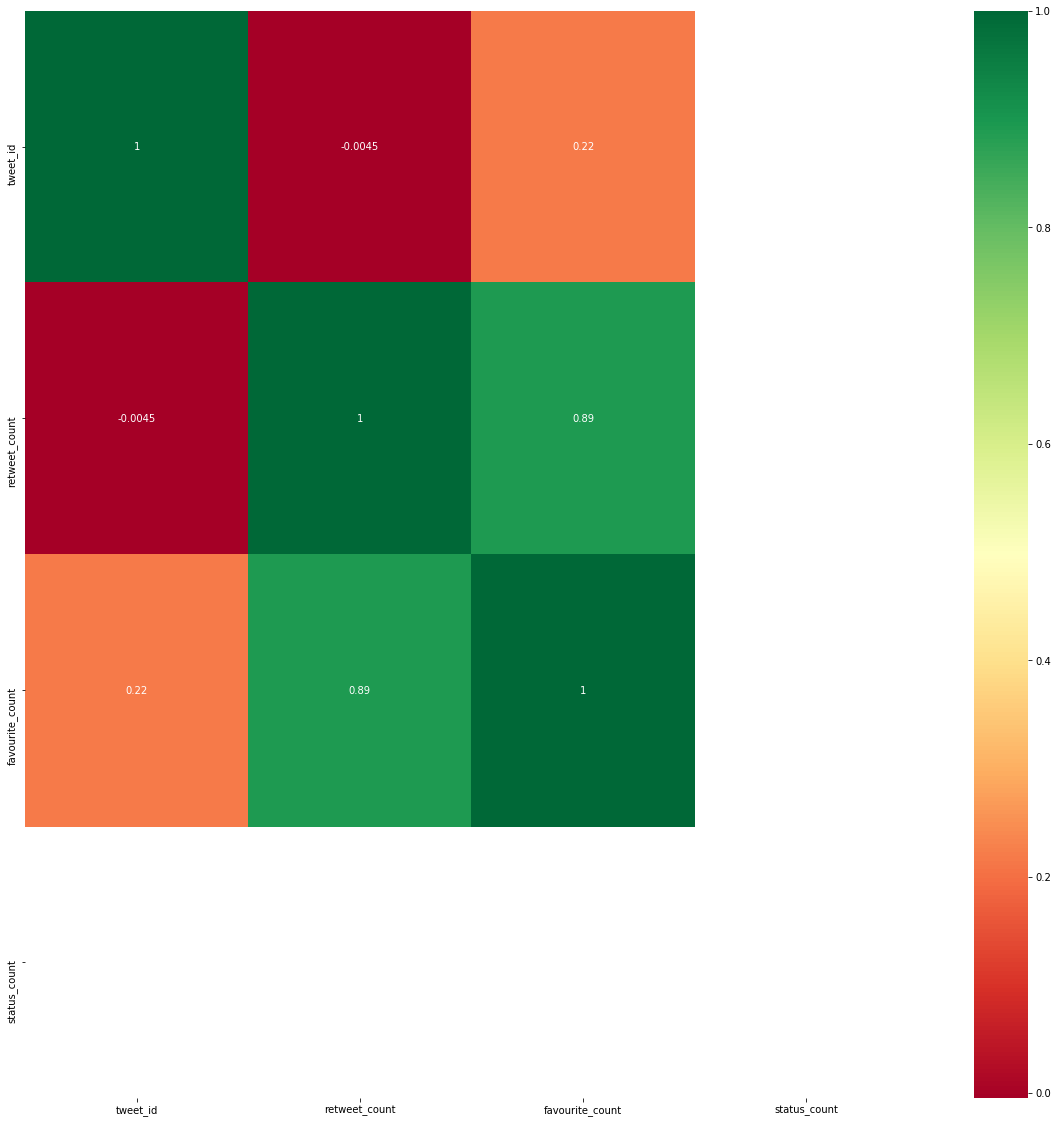

In [127]:
import seaborn as sns
mined_tweets = miner.mine_user_tweets(user='dril', max_pages=17)

df= pd.DataFrame(mined_tweets)
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [128]:
df.head(5)

,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name
0,1303937400356220929,wint,dril,1289,why turn myself in to the police.. when I can ...,2020-09-11 02:21:32.741027,2020-09-10 06:04:36,18591,[],10063,None,Twitter Web App,None,None,None
1,1303839786092826624,wint,dril,251,RT @fucker12345678: is having a great day with...,2020-09-11 02:21:32.741027,2020-09-09 23:36:43,0,[],10063,None,Twitter Web App,is having a great day with with god by my side,None,None
2,1303619696051118085,wint,dril,28,RT @pooty2: @Boscovs \nYour new rules are unac...,2020-09-11 02:21:32.741027,2020-09-09 09:02:10,0,[],10063,None,Twitter Web App,@Boscovs \nYour new rules are unacceptable. Ma...,None,None
3,1303616711141109764,wint,dril,703,The video games &amp; childrens tv show indust...,2020-09-11 02:21:32.741027,2020-09-09 08:50:18,7496,[],10063,None,Twitter Web App,None,None,None
4,1303594061345873922,wint,dril,466,IM GOING TO TURN OFF MY AD BLOCKER FOREVER -- ...,2020-09-11 02:21:32.741027,2020-09-09 07:20:18,8513,[],10063,None,Twitter Web App,None,None,None


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tweet_id           3211 non-null   int64         
 1   name               3211 non-null   object        
 2   screen_name        3211 non-null   object        
 3   retweet_count      3211 non-null   int64         
 4   text               3211 non-null   object        
 5   mined_at           3211 non-null   datetime64[ns]
 6   created_at         3211 non-null   datetime64[ns]
 7   favourite_count    3211 non-null   int64         
 8   hashtags           3211 non-null   object        
 9   status_count       3211 non-null   int64         
 10  location           0 non-null      object        
 11  source_device      3211 non-null   object        
 12  retweet_text       3211 non-null   object        
 13  quote_text         3211 non-null   object        
 14  quote_sc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DC5E26A48>,
      dtype=object)

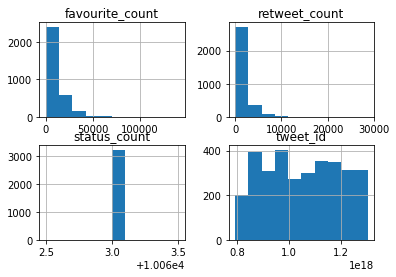

In [143]:
df.hist()

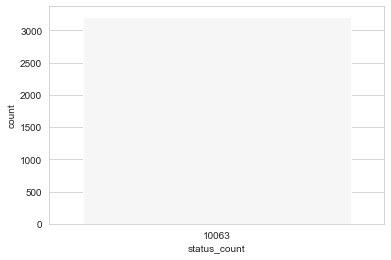

In [153]:
sns.set_style('whitegrid')
sns.countplot(x='status_count',data=df,palette='RdBu_r')

In [154]:
dataset = pd.get_dummies(df, columns = ['name', 'screen_name', 'source_device', 'retweet_text', 'quote_text', 'quote_screen_name'])

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['tweet_id', 'retweet_count', 'favourite_count' , 'status_count']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [156]:
dataset.head()

,tweet_id,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,name_wint,...,"retweet_text_¿que juego os gusta mas,need for speed rivals,pay day 2,saints rowIV?\nes por saver vuestra opinion para subir uno de estos juegos a mi canal",retweet_text_ı'm Work,retweet_text_Ну вы поняли кто живет в этом городе. В этом городе живу я. http://t.co/4VN6F4qoeA,retweet_text_الأسطورة \n\nThe legendary! \n#ColonelBucket https://t.co/ihrKBO51Fc,retweet_text_تشستر هو تشستر في كل مكان\n\nChester is Chester everywhere. #DollyPartonChallenge https://t.co/WbV7bcxRt9,"retweet_text_கெரானா aka CORVID- 19 என்கிற வூஹான் வைரஸ் aka சீன வைரஸ் செயற்கையாக உருவாக்கப்பட்ட ஒரு Terrorist வைரஸ்,\nஇது ஆரோக்யமான உடலில் எந்தவித ஸிம்டமும் காட்டாமல் மறைந்திருந்து பரவும் தன்மை உடையது என்கிறார்கள் ஐரோப்பிய ஆய்வாளர்கள்.\nஇது கவலை அளிக்கும் செய்தி.\n👇3 https://t.co/2Wd7FKnana",retweet_text_“Today I am honoring the heroes of 9/11 by _____.”,retweet_text_あぁMeat Boll おいしそう,quote_text_None,quote_screen_name_None
0,1.743242,-0.117520,why turn myself in to the police.. when I can ...,2020-09-11 02:21:32.741027,2020-09-10 06:04:36,0.739716,[],0.0,None,1,...,0,0,0,0,0,0,0,0,1,1
1,1.742566,-0.625629,RT @fucker12345678: is having a great day with...,2020-09-11 02:21:32.741027,2020-09-09 23:36:43,-0.872828,[],0.0,None,1,...,0,0,0,0,0,0,0,0,1,1
2,1.741042,-0.734789,RT @pooty2: @Boscovs \nYour new rules are unac...,2020-09-11 02:21:32.741027,2020-09-09 09:02:10,-0.872828,[],0.0,None,1,...,0,0,0,0,0,0,0,0,1,1
3,1.741021,-0.404371,The video games &amp; childrens tv show indust...,2020-09-11 02:21:32.741027,2020-09-09 08:50:18,-0.222641,[],0.0,None,1,...,0,0,0,0,0,0,0,0,1,1
4,1.740864,-0.520384,IM GOING TO TURN OFF MY AD BLOCKER FOREVER -- ...,2020-09-11 02:21:32.741027,2020-09-09 07:20:18,-0.134428,[],0.0,None,1,...,0,0,0,0,0,0,0,0,1,1


In [165]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=ae55bbd050b76dc34f1a0f7fefd0b267776a86f078079c2e4c22ff00d8ae1ec7
  Stored in directory: c:\users\soumya\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [175]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,100):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=2)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

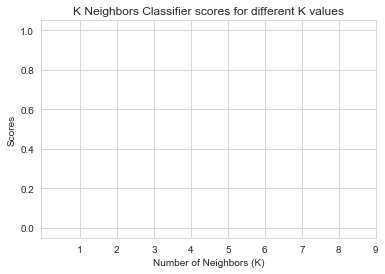

In [176]:
plt.plot([k for k in range(1, 100)], knn_scores, color = 'red')
for i in range(1,100):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [14]:
consumer_key = 'HOXs6dN9UApOrjdP3sDG8q7Bx'
consumer_secret = 'TzR3sATRX2FwL61Qhro1d4KenvLhKuCvYNS5OKzmxeK7HRkRg2'
access_token = '1301245220416188416-DvgyzLiFkYDfdozX0Afl2WR8eItktR'
access_token_secret = 'ZjeOuGzFw440IkvbPlKUKshONinTU136UVU9twyG5cUhJ'

In [15]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [16]:
search_term = "#coronavirus+covid -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-06-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

["#coronavirus •Amit Shah admitted in AIIMS for 'full medical examination' •\n\n#coronavirus #Covid_19 #HomeMinister… https://t.co/xTgEQ7GJDY",
 'LOCKDOWN: Learn the sign s of Coronavirus COVID-19 illness and what to do:  https://t.co/RnO6KVNLtk+… https://t.co/aF8668Yyb7',
 "Going 'out out'. Will this ever stop being weird?!\n.\n.\n#facemask #covid_19 #coronavirus #covidcoping #2020 @ Rye, E… https://t.co/TntXAUxzmk",
 '@MichiganDOT Cash payments are not accepted from eastbound @MDOT_BWB #BlueWaterBridge customers during the #COVID-1… https://t.co/1BPcLCBw9C',
 'New COVID-19 Data at 2020-09-13 05:30:00 am EDT #Coronavirus #COVID19 https://t.co/euX7WKTtiT']

In [17]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [18]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['coronavirus Amit Shah admitted in AIIMS for full medical examination coronavirus Covid19 HomeMinister',
 'LOCKDOWN Learn the sign s of Coronavirus COVID19 illness and what to do',
 'Going out out Will this ever stop being weirdfacemask covid19 coronavirus covidcoping 2020 Rye E',
 'MichiganDOT Cash payments are not accepted from eastbound MDOTBWB BlueWaterBridge customers during the COVID1',
 'New COVID19 Data at 20200913 053000 am EDT Coronavirus COVID19']

In [19]:
# Note how capitalization impacts unique returned values
ex_list = ["coronavirus", "covid 19", "Coronavirus", "COVID 19", "corona", "Corona"]

# Get unique elements in the list
set(ex_list)

{'COVID 19', 'Corona', 'Coronavirus', 'corona', 'coronavirus', 'covid 19'}

In [20]:
# Note how capitalization impacts unique returned values
words_list = ["coronavirus", "covid 19", "Coronavirus", "COVID 19", "corona", "Corona"]

# Make all elements in the list lowercase
lower_case = [word.lower() for word in words_list]

# Get all elements in the list
lower_case

['coronavirus', 'covid 19', 'coronavirus', 'covid 19', 'corona', 'corona']

In [21]:
set(lower_case)

{'corona', 'coronavirus', 'covid 19'}

In [22]:
all_tweets_no_urls[0].split()

['coronavirus',
 'Amit',
 'Shah',
 'admitted',
 'in',
 'AIIMS',
 'for',
 'full',
 'medical',
 'examination',
 'coronavirus',
 'Covid19',
 'HomeMinister']

In [23]:
all_tweets_no_urls[0].lower().split()

['coronavirus',
 'amit',
 'shah',
 'admitted',
 'in',
 'aiims',
 'for',
 'full',
 'medical',
 'examination',
 'coronavirus',
 'covid19',
 'homeminister']

In [24]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['coronavirus',
  'amit',
  'shah',
  'admitted',
  'in',
  'aiims',
  'for',
  'full',
  'medical',
  'examination',
  'coronavirus',
  'covid19',
  'homeminister'],
 ['lockdown',
  'learn',
  'the',
  'sign',
  's',
  'of',
  'coronavirus',
  'covid19',
  'illness',
  'and',
  'what',
  'to',
  'do']]

In [25]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('covid19', 610),
 ('coronavirus', 493),
 ('the', 441),
 ('of', 280),
 ('to', 278),
 ('in', 245),
 ('covid', 190),
 ('cases', 178),
 ('a', 175),
 ('and', 169),
 ('for', 166),
 ('is', 140),
 ('new', 132),
 ('on', 100),
 ('with', 92)]

In [26]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,covid19,610
1,coronavirus,493
2,the,441
3,of,280
4,to,278


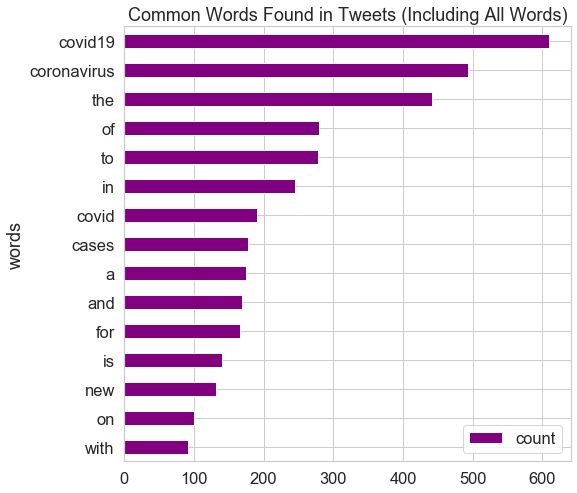

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soumya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

["needn't",
 'ma',
 'don',
 'for',
 'or',
 'some',
 'yourself',
 'hadn',
 'between',
 'do']

In [30]:
words_in_tweet[0]

['coronavirus',
 'amit',
 'shah',
 'admitted',
 'in',
 'aiims',
 'for',
 'full',
 'medical',
 'examination',
 'coronavirus',
 'covid19',
 'homeminister']

In [31]:
for all_words in words_in_tweet:
    for a_word in all_words:
        # remove stop words
        # Remove stop words from each tweet list of words
     tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['coronavirus',
 'amit',
 'shah',
 'admitted',
 'aiims',
 'full',
 'medical',
 'examination',
 'coronavirus',
 'covid19',
 'homeminister']

In [32]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('covid19', 610),
 ('coronavirus', 493),
 ('covid', 190),
 ('cases', 178),
 ('new', 132),
 ('trump', 75),
 ('deaths', 70),
 ('pandemic', 60),
 ('india', 56),
 ('vaccine', 53),
 ('uk', 46),
 ('health', 46),
 ('people', 45),
 ('amp', 38),
 ('september', 36)]

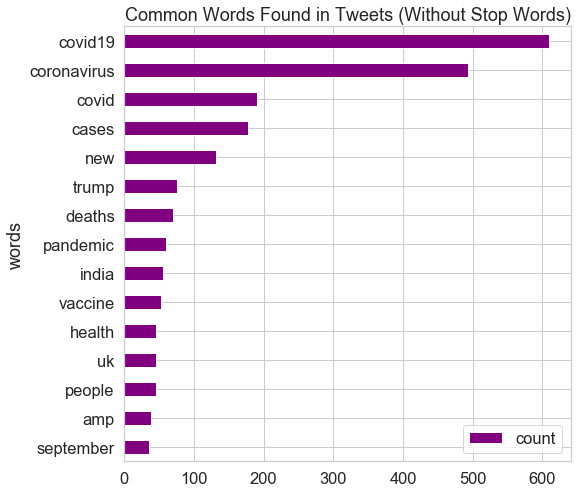

In [33]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [34]:
collection_words = ['covid 19', 'coronavirus', 'india']

In [35]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [36]:
tweets_nsw[0]

['coronavirus',
 'amit',
 'shah',
 'admitted',
 'aiims',
 'full',
 'medical',
 'examination',
 'coronavirus',
 'covid19',
 'homeminister']

In [37]:
tweets_nsw_nc[0]

['amit',
 'shah',
 'admitted',
 'aiims',
 'full',
 'medical',
 'examination',
 'covid19',
 'homeminister']

In [38]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('covid19', 610),
 ('covid', 190),
 ('cases', 178),
 ('new', 132),
 ('trump', 75),
 ('deaths', 70),
 ('pandemic', 60),
 ('vaccine', 53),
 ('uk', 46),
 ('health', 46),
 ('people', 45),
 ('amp', 38),
 ('september', 36),
 ('amid', 36),
 ('data', 35)]

In [39]:
len(counts_nsw_nc)

3993

In [40]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,covid19,610
1,covid,190
2,cases,178
3,new,132
4,trump,75


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
clean_tweets_ncw.describe()

,count
count,15.000000
mean,110.000000
std,147.420681
min,35.000000
25%,41.500000
50%,53.000000
75%,103.500000
max,610.000000


In [43]:
clean_tweets_ncw.columns=['covid19','cases']

In [44]:
clean_tweets_ncw.head()

,covid19,cases
0,covid19,610
1,covid,190
2,cases,178
3,new,132
4,trump,75


In [45]:
clean_tweets_ncw.shape

(15, 2)

In [46]:
clean_tweets_ncw.columns

Index(['covid19', 'cases'], dtype='object')

In [47]:
clean_tweets_ncw.dtypes

covid19    object
cases       int64
dtype: object

In [48]:
clean_tweets_ncw.isnull().sum()

covid19    0
cases      0
dtype: int64

In [49]:
tmp=pd.DataFrame(index=clean_tweets_ncw.columns)
tmp['data_types']=clean_tweets_ncw.dtypes
tmp['null_count']=clean_tweets_ncw.isnull().sum()
tmp['unique_count']=clean_tweets_ncw.nunique()
tmp

,data_types,null_count,unique_count
covid19,object,0,15
cases,int64,0,13


In [50]:
clean_tweets_ncw.drop_duplicates()

,covid19,cases
0,covid19,610
1,covid,190
2,cases,178
3,new,132
4,trump,75
5,deaths,70
6,pandemic,60
7,vaccine,53
8,uk,46
9,health,46


In [51]:
clean_tweets_ncw['covid19'].fillna(value=(clean_tweets_ncw['cases'].mean()),inplace=True)

In [52]:
clean_tweets_ncw.isnull().sum()

covid19    0
cases      0
dtype: int64

In [53]:
clean_tweets_ncw=pd.get_dummies(clean_tweets_ncw)

In [54]:
clean_tweets_ncw.head()

,cases,covid19_amid,covid19_amp,covid19_cases,covid19_covid,covid19_covid19,covid19_data,covid19_deaths,covid19_health,covid19_new,covid19_pandemic,covid19_people,covid19_september,covid19_trump,covid19_uk,covid19_vaccine
0,610,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,190,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,178,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,132,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,75,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
clean_tweets_ncw['cases'].value_counts()

46     2
36     2
70     1
190    1
60     1
53     1
178    1
45     1
75     1
38     1
132    1
35     1
610    1
Name: cases, dtype: int64

# K-Nearest Neighbors Classifier

In [56]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [57]:
clean_tweets_ncw.head()

,cases,covid19_amid,covid19_amp,covid19_cases,covid19_covid,covid19_covid19,covid19_data,covid19_deaths,covid19_health,covid19_new,covid19_pandemic,covid19_people,covid19_september,covid19_trump,covid19_uk,covid19_vaccine
0,610,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,190,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,178,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,132,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,75,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
clean_tweets_ncw.head()

,cases,covid19_amid,covid19_amp,covid19_cases,covid19_covid,covid19_covid19,covid19_data,covid19_deaths,covid19_health,covid19_new,covid19_pandemic,covid19_people,covid19_september,covid19_trump,covid19_uk,covid19_vaccine
0,610,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,190,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,178,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,132,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,75,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Data exploration and visualization

correlation matrix -

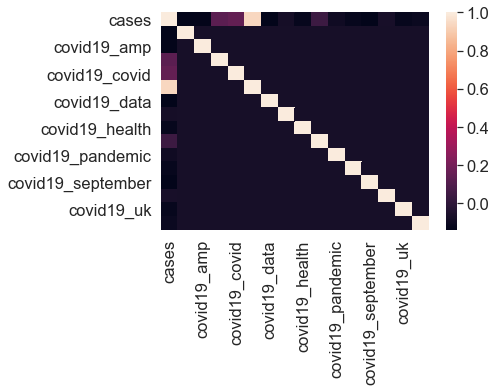

In [59]:
cor = clean_tweets_ncw.corr()
sns.heatmap(cor)

# Scatter plot of two features, and pairwise plot

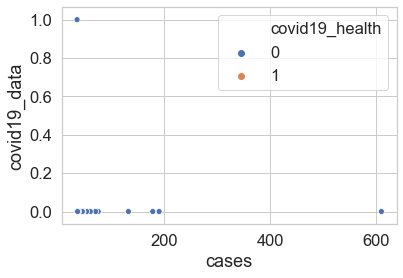

In [63]:
sns.scatterplot(clean_tweets_ncw['cases'],clean_tweets_ncw['covid19_data'],hue=clean_tweets_ncw['covid19_health'])

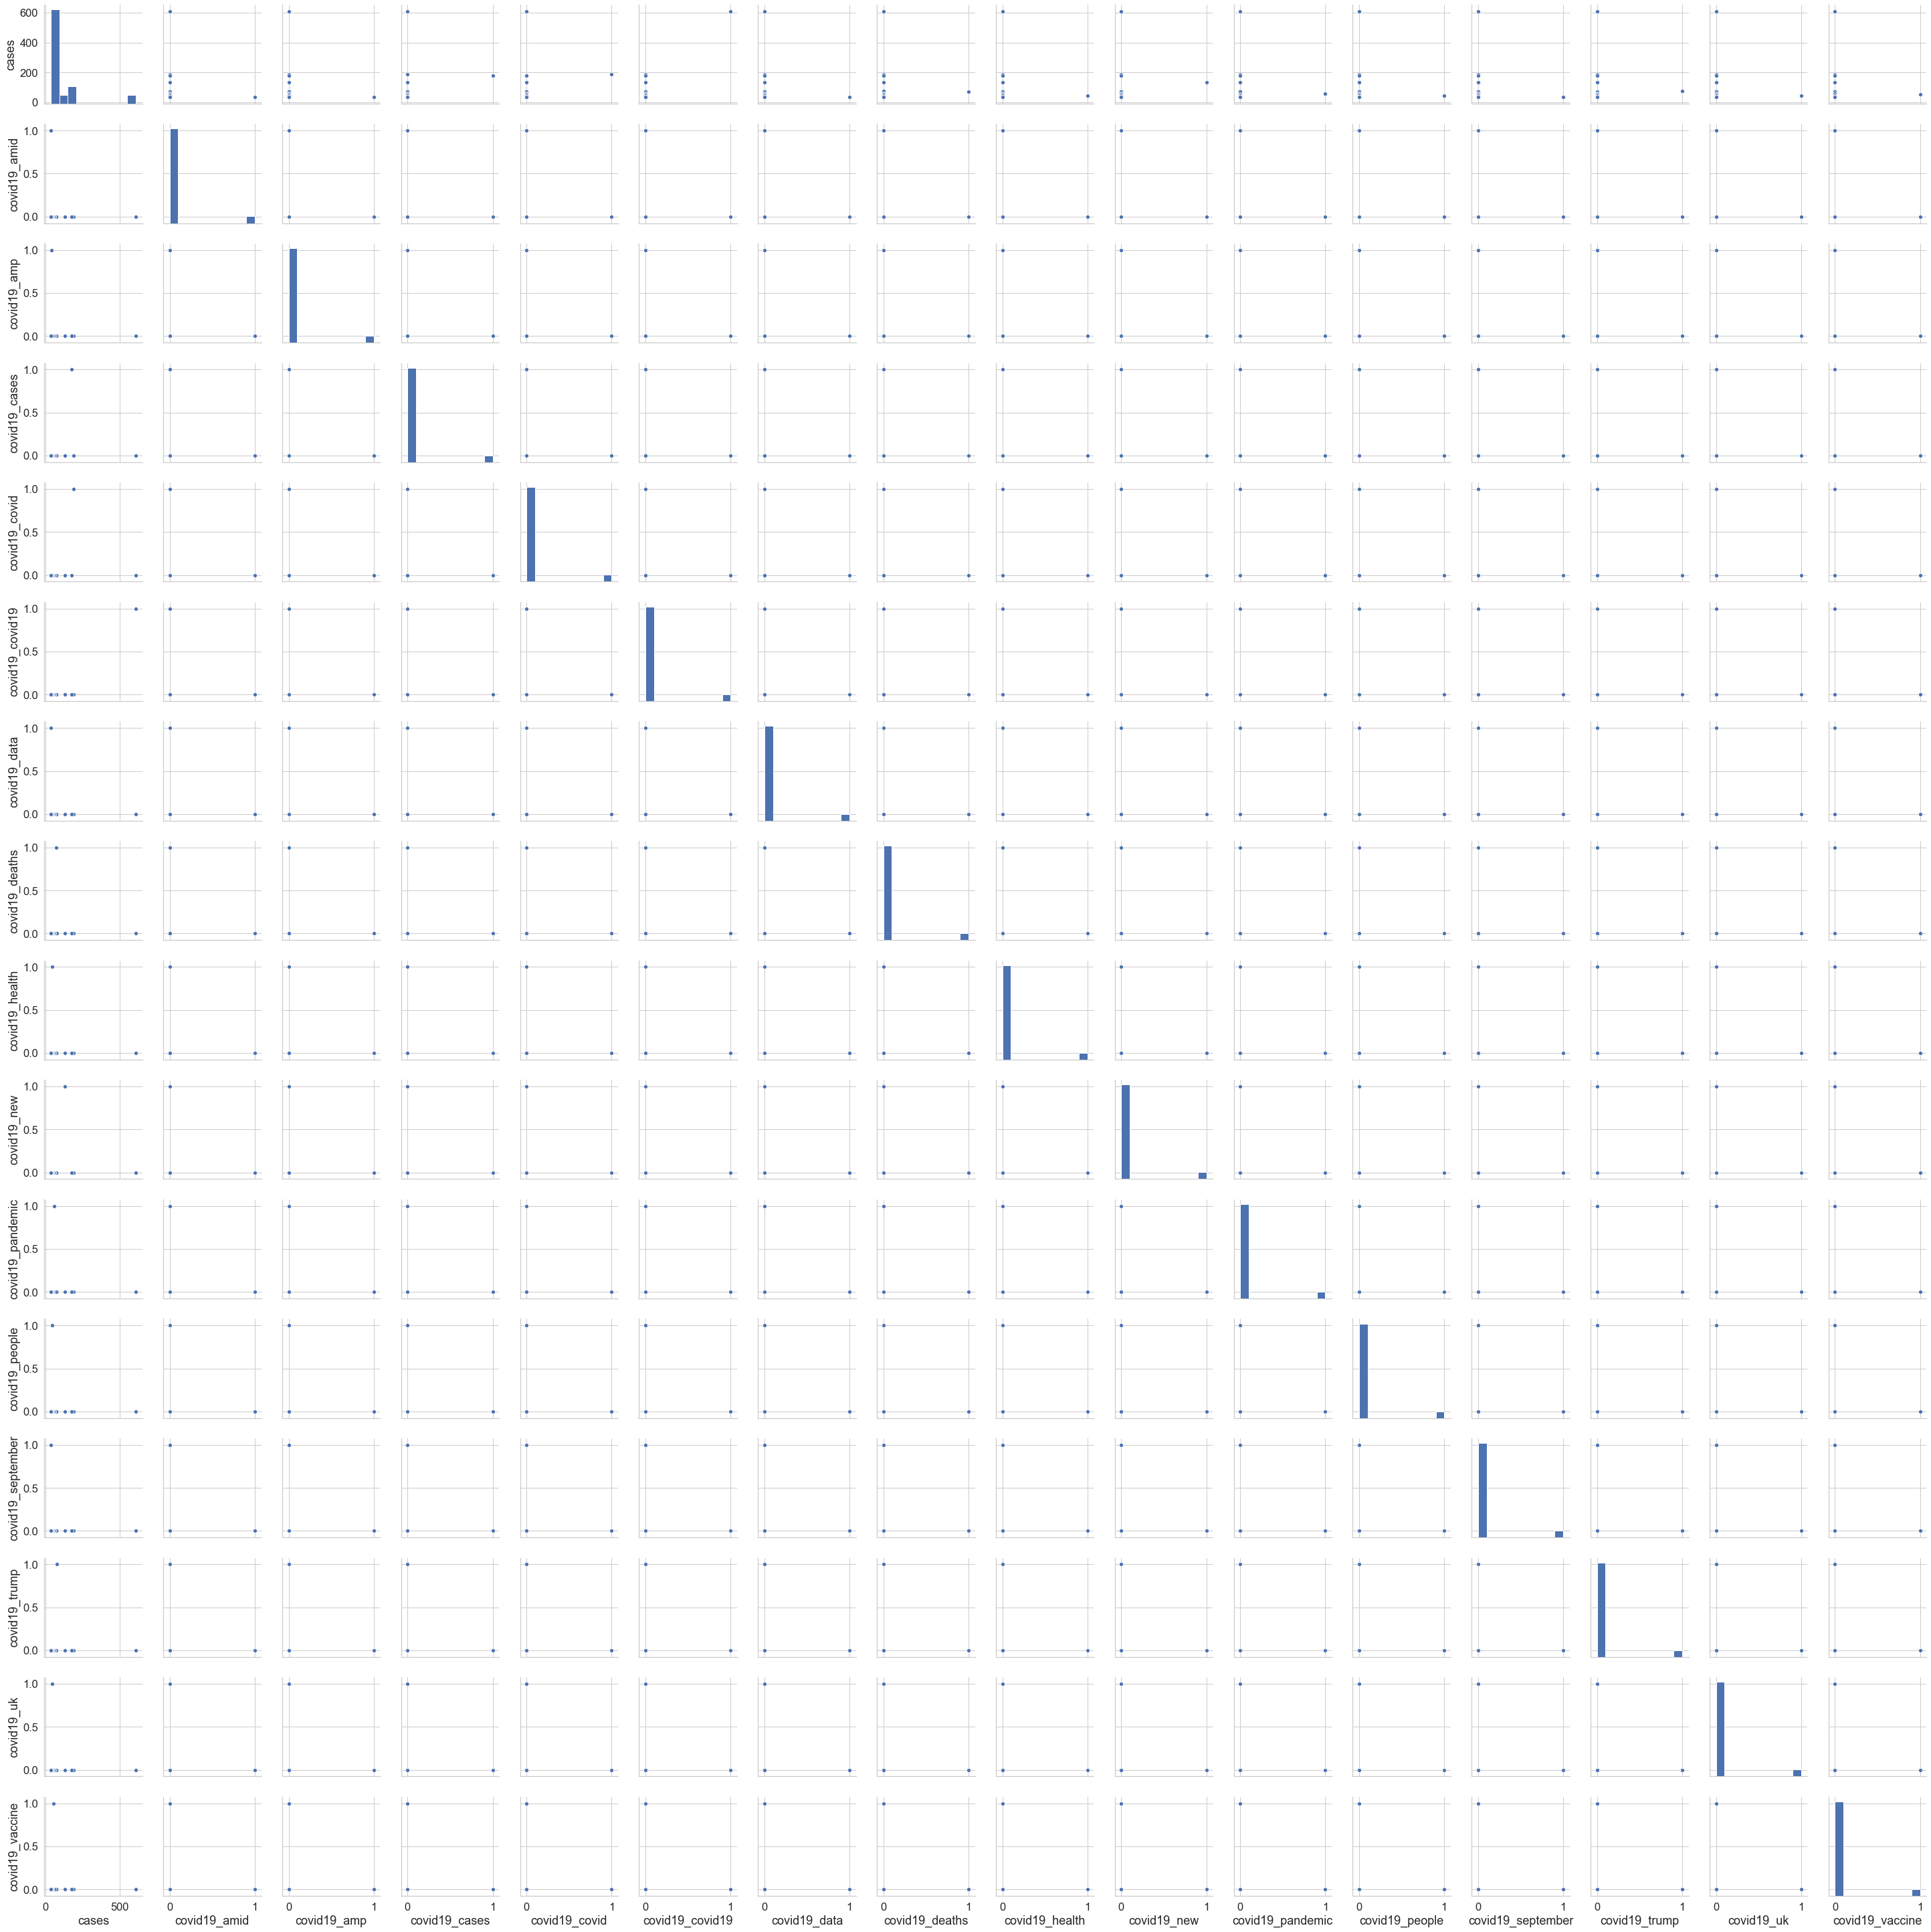

In [64]:
sns.pairplot(clean_tweets_ncw)
plt.show()

# Feature Scaling

Scaling is necessary for distance-based algorithms such as KNN. This is to avoid higher weightage being assigned to data with a higher magnitude.

Using standard scaler we can scale down to unit variance.

Formula:

z = (x - u) / s

where x -> value, u -> mean, s -> standard deviation

In [65]:
scaler = StandardScaler()

In [66]:
scaler.fit(clean_tweets_ncw.drop('cases',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
#perform transformation
scaled_features = scaler.transform(clean_tweets_ncw.drop('cases',axis=1))
scaled_features

array([[-0.26726124, -0.26726124, -0.26726124, -0.26726124,  3.74165739,
        -0.26726124, -0.26726124, -0.26726124, -0.26726124, -0.26726124,
        -0.26726124, -0.26726124, -0.26726124, -0.26726124, -0.26726124],
       [-0.26726124, -0.26726124, -0.26726124,  3.74165739, -0.26726124,
        -0.26726124, -0.26726124, -0.26726124, -0.26726124, -0.26726124,
        -0.26726124, -0.26726124, -0.26726124, -0.26726124, -0.26726124],
       [-0.26726124, -0.26726124,  3.74165739, -0.26726124, -0.26726124,
        -0.26726124, -0.26726124, -0.26726124, -0.26726124, -0.26726124,
        -0.26726124, -0.26726124, -0.26726124, -0.26726124, -0.26726124],
       [-0.26726124, -0.26726124, -0.26726124, -0.26726124, -0.26726124,
        -0.26726124, -0.26726124, -0.26726124,  3.74165739, -0.26726124,
        -0.26726124, -0.26726124, -0.26726124, -0.26726124, -0.26726124],
       [-0.26726124, -0.26726124, -0.26726124, -0.26726124, -0.26726124,
        -0.26726124, -0.26726124, -0.26726124, 

In [69]:
clean_tweets_ncw = pd.DataFrame(scaled_features,columns=clean_tweets_ncw.columns[:-1])
clean_tweets_ncw.head()


,cases,covid19_amid,covid19_amp,covid19_cases,covid19_covid,covid19_covid19,covid19_data,covid19_deaths,covid19_health,covid19_new,covid19_pandemic,covid19_people,covid19_september,covid19_trump,covid19_uk
0,-0.267261,-0.267261,-0.267261,-0.267261,3.741657,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261
1,-0.267261,-0.267261,-0.267261,3.741657,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261
2,-0.267261,-0.267261,3.741657,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261
3,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261
4,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657,-0.267261,-0.267261


In [70]:
from sklearn.neighbors import KNeighborsRegressor

# Applying KNN

Drop features that are not required
Use random state while splitting the data to ensure reproducibility and consistency
Experiment with distance metrics - Euclidean, manhattan

In [71]:
dff = clean_tweets_ncw.drop(['covid19_data','covid19_health'],axis=1) #Removing features -  covid19_cases and covid19_india
X_train,X_test,y_train,y_test  = train_test_split(dff,clean_tweets_ncw['cases'],test_size=0.3,random_state=45) #setting random state ensures split is same eveytime, so that the results are comparable

In [72]:
knn = KNeighborsRegressor(n_neighbors=4,metric='manhattan')

In [73]:
clean_tweets_ncw.shape

(15, 15)

In [74]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [75]:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [76]:
y_pred = knn.predict(X_test)

In [77]:
print(y_test,y_pred)

9    -0.267261
8    -0.267261
6    -0.267261
2    -0.267261
10   -0.267261
Name: cases, dtype: float64 [-0.26726124 -0.26726124 -0.26726124 -0.26726124 -0.26726124]


In [78]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 0.0
RMSE value for k=  3 is: 0.0
RMSE value for k=  4 is: 0.0
RMSE value for k=  5 is: 0.50709255283711
RMSE value for k=  6 is: 0.6681531047810609
RMSE value for k=  7 is: 0.5727026612409094
RMSE value for k=  8 is: 0.5011148285857958
RMSE value for k=  9 is: 0.445435403187374
RMSE value for k=  10 is: 0.40089186286863665


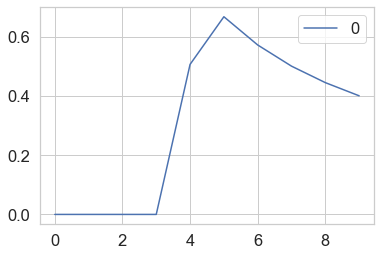

In [80]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [83]:


# import necessary modules  
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
  
# load the data set 
data = words_in_tweet[0]
  
# print info about columns in the dataframe 
print(data)

['coronavirus', 'amit', 'shah', 'admitted', 'in', 'aiims', 'for', 'full', 'medical', 'examination', 'coronavirus', 'covid19', 'homeminister']


In [92]:
data

['coronavirus',
 'amit',
 'shah',
 'admitted',
 'in',
 'aiims',
 'for',
 'full',
 'medical',
 'examination',
 'coronavirus',
 'covid19',
 'homeminister']

In [96]:
tmp=pd.DataFrame(index=clean_tweets_ncw.columns)
tmp['data_types']=clean_tweets_ncw.dtypes
tmp['null_count']=clean_tweets_ncw.isnull().sum()
tmp['unique_count']=clean_tweets_ncw.nunique()
tmp

,data_types,null_count,unique_count
cases,float64,0,2
covid19_amid,float64,0,2
covid19_amp,float64,0,2
covid19_cases,float64,0,2
covid19_covid,float64,0,2
covid19_covid19,float64,0,2
covid19_data,float64,0,2
covid19_deaths,float64,0,2
covid19_health,float64,0,2
covid19_new,float64,0,2


In [97]:
clean_tweets_ncw.drop_duplicates()

,cases,covid19_amid,covid19_amp,covid19_cases,covid19_covid,covid19_covid19,covid19_data,covid19_deaths,covid19_health,covid19_new,covid19_pandemic,covid19_people,covid19_september,covid19_trump,covid19_uk
0,-0.267261,-0.267261,-0.267261,-0.267261,3.741657,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261
1,-0.267261,-0.267261,-0.267261,3.741657,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261
2,-0.267261,-0.267261,3.741657,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261
3,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261
4,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657,-0.267261,-0.267261
5,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261
6,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261
7,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657
8,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657,-0.267261
9,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261


In [99]:
clean_tweets_ncw['covid19_deaths'].fillna(value=(clean_tweets_ncw['cases'].mean()),inplace=True)

In [100]:
clean_tweets_ncw.isnull().sum()

cases                0
covid19_amid         0
covid19_amp          0
covid19_cases        0
covid19_covid        0
covid19_covid19      0
covid19_data         0
covid19_deaths       0
covid19_health       0
covid19_new          0
covid19_pandemic     0
covid19_people       0
covid19_september    0
covid19_trump        0
covid19_uk           0
dtype: int64

In [101]:
clean_tweets_ncw=pd.get_dummies(clean_tweets_ncw)

In [102]:
clean_tweets_ncw['cases'].value_counts()

-0.267261    14
 3.741657     1
Name: cases, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
dff = clean_tweets_ncw.drop(['covid19_data','covid19_deaths'],axis=1) #Removing features -  covid19_data and covid19_deaths
X_train,X_test,y_train,y_test  = train_test_split(dff,clean_tweets_ncw['cases'],test_size=0.3,random_state=45) #setting random state ensures split is same eveytime, so that the results are comparable

In [107]:
from sklearn.model_selection import train_test_split 
  
  
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (10, 13)
Number transactions y_train dataset:  (10,)
Number transactions X_test dataset:  (5, 13)
Number transactions y_test dataset:  (5,)


# Now train the model for handling Class Imbalance using SMOTE-SVM

In [110]:
!pip install SVM

  Created wheel for SVM: filename=svm-0.1.0-py3-none-any.whl size=3487 sha256=6c5923fe7f70f84973a487aa8e57998733b02c510a25ede4fc4f841d112a120a
  Stored in directory: c:\users\soumya\appdata\local\pip\cache\wheels\17\78\bc\2f7ee465ee53ccdf86e3332e6f2fd6b648f1b8278e18cab968
Successfully built SVM


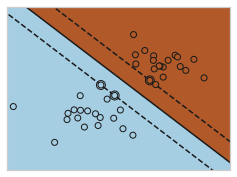

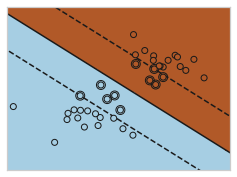

In [112]:
import svm
import pandas as pd
data = pd.DataFrame(index=clean_tweets_ncw.columns)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()